In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("exported_data.csv")

## Fossil Fuels

In [4]:
grouping_column = 'is_esg'
columns_to_average = [
    'fossil_holdings_weight',
    'fossil_finance_score',
    'fossil_finance_weight',
    'relative_carbon_footprint',
    'relative_carbon_intensity'
]

result = df.groupby(grouping_column)[columns_to_average].mean()

# --- Display the result ---
print(f"\nMean of specified columns grouped by '{grouping_column}':")
print(result)


Mean of specified columns grouped by 'is_esg':
        fossil_holdings_weight  fossil_finance_score  fossil_finance_weight  \
is_esg                                                                        
False                 0.090789             10.234673               0.023507   
True                  0.055224              7.550000               0.019729   

        relative_carbon_footprint  relative_carbon_intensity  
is_esg                                                        
False                  140.158402                 178.725797  
True                   119.292876                 170.532180  


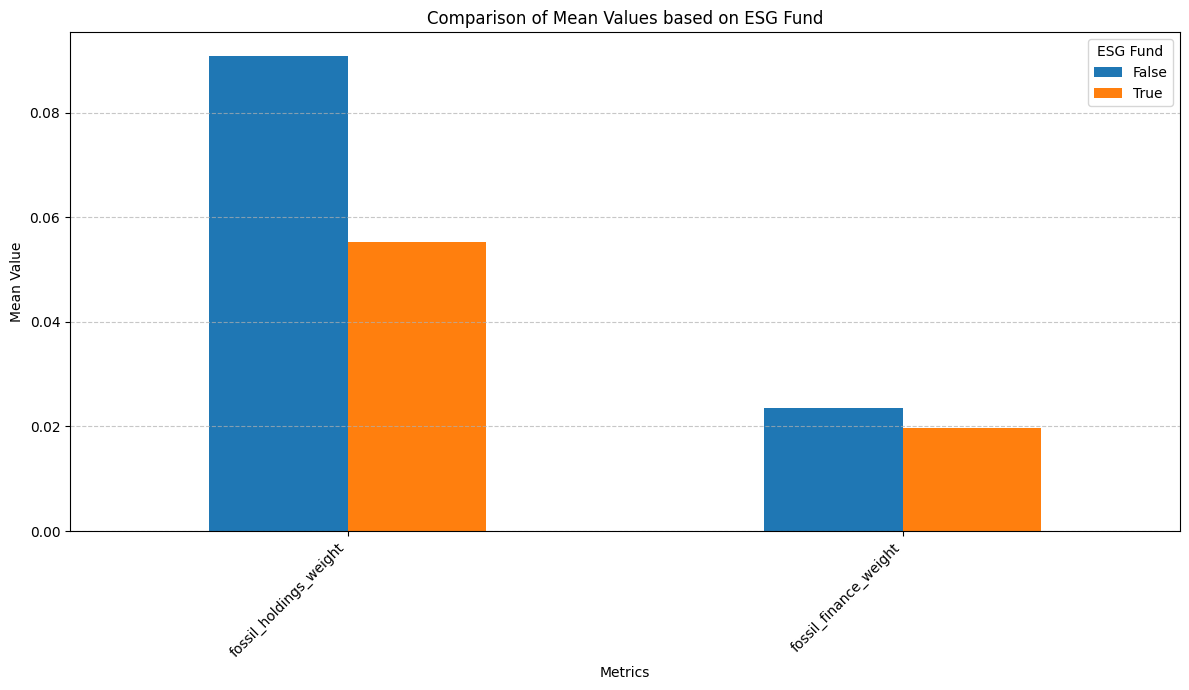

In [6]:
result_transposed = result.T

# Create the plot
ax = result_transposed.plot(kind='bar', figsize=(12, 7), rot=45) # rot rotates x-axis labels

# --- Customize the plot ---
plt.title(f'Comparison of Mean Values based on ESG Fund')
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.xticks(ha='right') # Align rotated labels nicely
plt.legend(title="ESG Fund") # Use the grouping column name for the legend title
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Show the plot ---
plt.show()

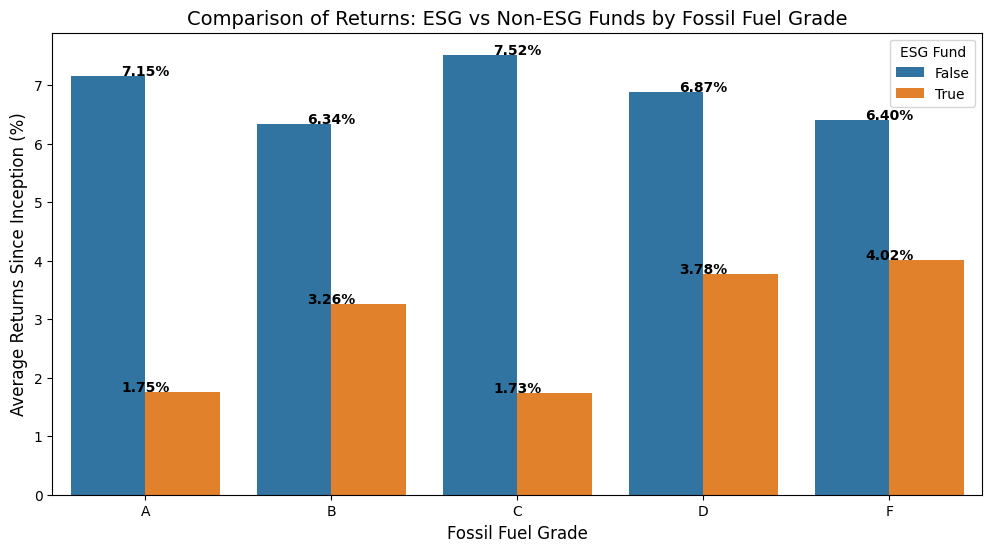

In [11]:
# Assuming your dataframe is called 'df'
result = df.groupby(['is_esg', 'fossil_fuel_grade'])['returns_since_inception'].mean().reset_index()

# For a pivot table format
pivot_result = df.pivot_table(
    values='returns_since_inception',
    index='is_esg',
    columns='fossil_fuel_grade',
    aggfunc='mean'
)

# Set figure size
plt.figure(figsize=(12, 6))


sns.barplot(
    data=result,
    x='fossil_fuel_grade',
    y='returns_since_inception',
    hue='is_esg'
)
# Set figure size

# Add labels and title
plt.xlabel('Fossil Fuel Grade', fontsize=12)
plt.ylabel('Average Returns Since Inception (%)', fontsize=12)
plt.title('Comparison of Returns: ESG vs Non-ESG Funds by Fossil Fuel Grade', fontsize=14)

# Add value labels on top of each bar
for i, row in enumerate(result.itertuples()):
    plt.text(
        i % len(result['fossil_fuel_grade'].unique()), 
        row.returns_since_inception + 0.01,  # Slight offset above bar
        f'{row.returns_since_inception:.2f}%',
        ha='center',
        fontweight='bold'
    )

# Improve legend
plt.legend(title='ESG Fund')


# Show plot
plt.show()

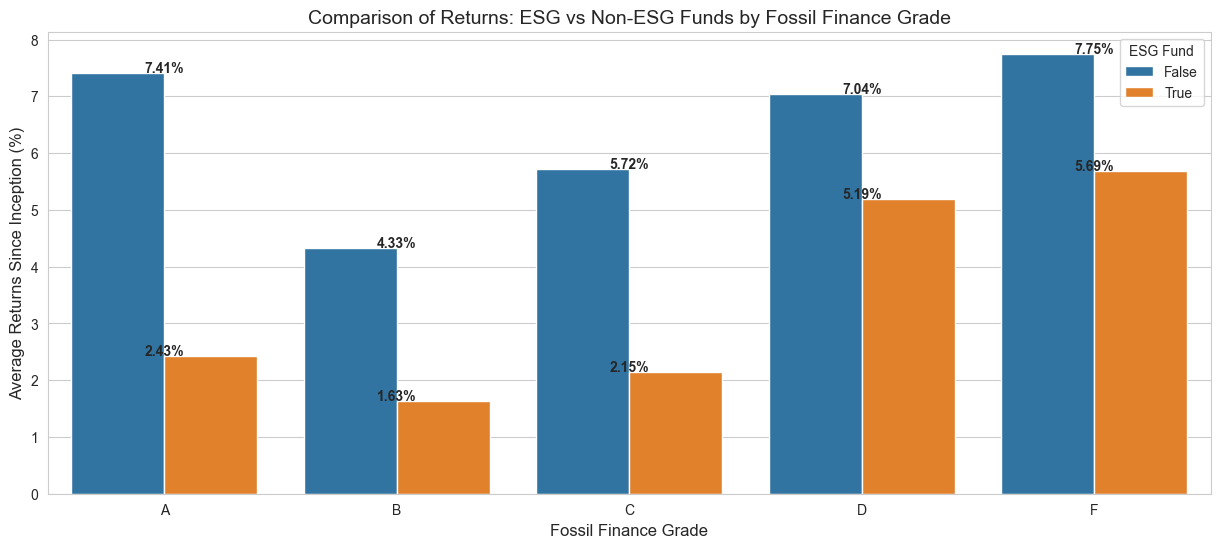

In [16]:
# Assuming your dataframe is called 'df'
result = df.groupby(['is_esg', 'fossil_finance_grade'])['returns_since_inception'].mean().reset_index()

# For a pivot table format
pivot_result = df.pivot_table(
    values='returns_since_inception',
    index='is_esg',
    columns='fossil_finance_grade',
    aggfunc='mean'
)

# Set figure size
plt.figure(figsize=(15, 6))


sns.barplot(
    data=result,
    x='fossil_finance_grade',
    y='returns_since_inception',
    hue='is_esg'
)
# Set figure size

# Add labels and title
plt.xlabel('Fossil Finance Grade', fontsize=12)
plt.ylabel('Average Returns Since Inception (%)', fontsize=12)
plt.title('Comparison of Returns: ESG vs Non-ESG Funds by Fossil Finance Grade', fontsize=14)

# Add value labels on top of each bar
for i, row in enumerate(result.itertuples()):
    plt.text(
        i % len(result['fossil_finance_grade'].unique()), 
        row.returns_since_inception + 0.01,  # Slight offset above bar
        f'{row.returns_since_inception:.2f}%',
        ha='center',
        fontweight='bold'
    )

# Improve legend
plt.legend(title='ESG Fund')


# Show plot
plt.show()

/var/folders/q3/37tc09x518n_lg3x1r20km3h0000gn/T/ipykernel_64119/2286520163.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holdings_grouped = df.groupby(['is_esg', 'holdings_bin'])['returns_since_inception'].mean().reset_index()
/var/folders/q3/37tc09x518n_lg3x1r20km3h0000gn/T/ipykernel_64119/2286520163.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  finance_grouped = df.groupby(['is_esg', 'finance_bin'])['returns_since_inception'].mean().reset_index()


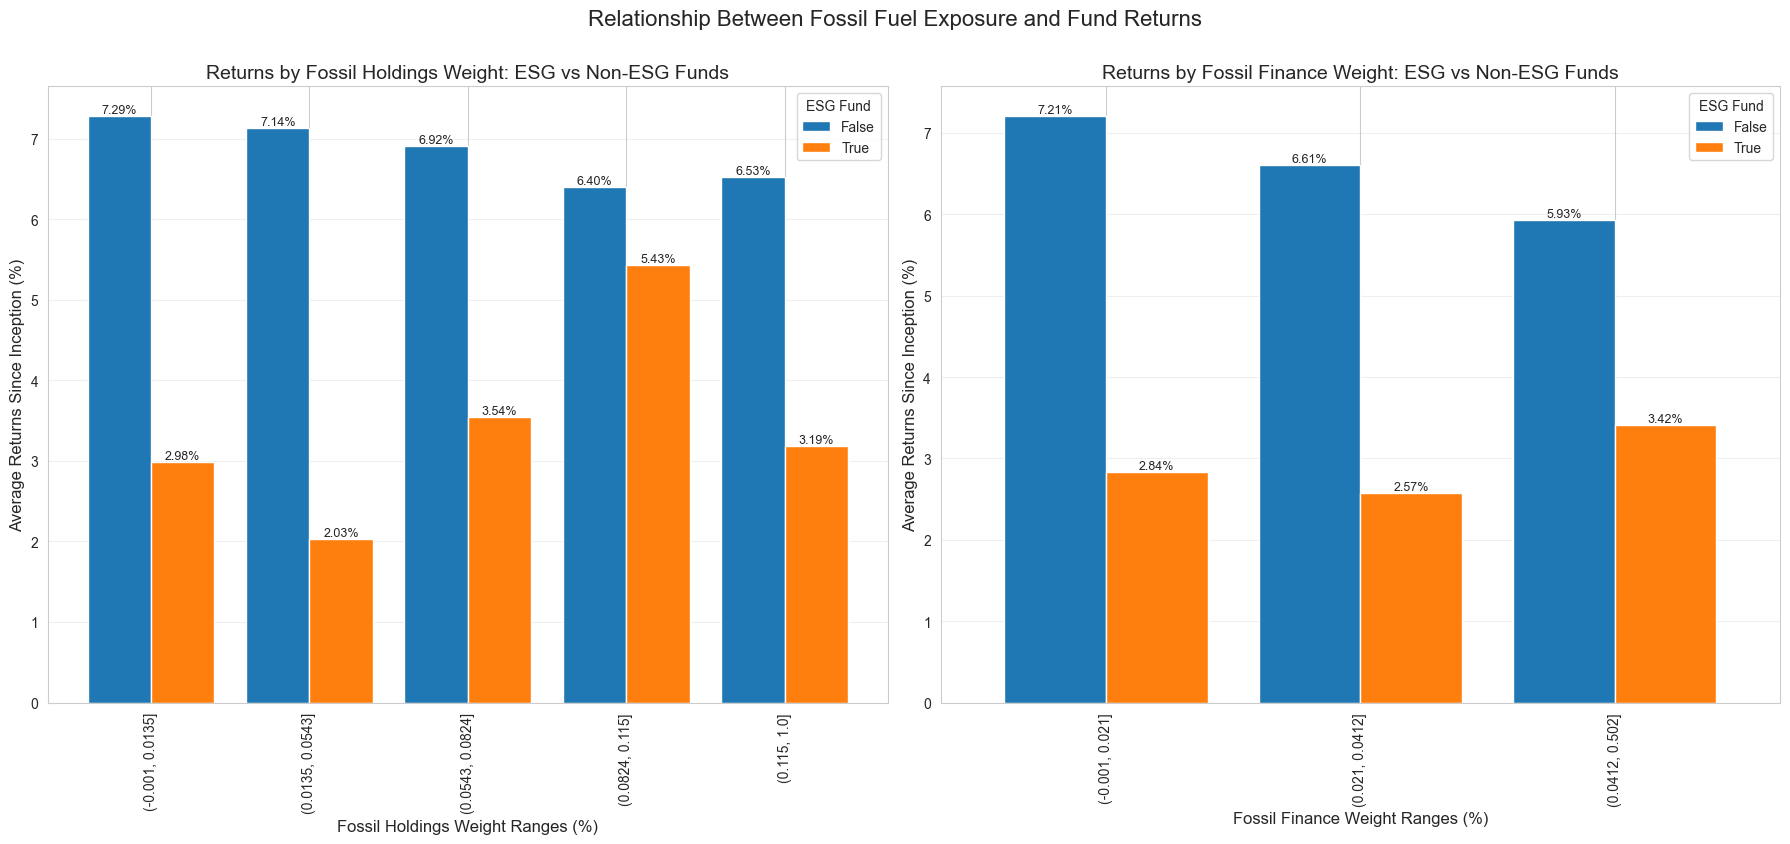

In [5]:
sns.set_style("whitegrid")

# Create a 1x2 subplot layout (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

try:
    # First check if we have enough unique values
    if df['fossil_holdings_weight'].nunique() < 5:
        n_bins = min(3, df['fossil_holdings_weight'].nunique())
    else:
        n_bins = 5
        
    # Create the bins
    df['holdings_bin'] = pd.qcut(df['fossil_holdings_weight'], n_bins, duplicates='drop')
    
    # Group by ESG status and fossil holdings bins
    holdings_grouped = df.groupby(['is_esg', 'holdings_bin'])['returns_since_inception'].mean().reset_index()
    
    # Pivot the data for easier plotting
    holdings_pivot = holdings_grouped.pivot(index='holdings_bin', columns='is_esg', values='returns_since_inception')
    
    # Plot the grouped bar chart
    holdings_pivot.plot(kind='bar', ax=axes[0], width=0.8)
    
except Exception as e:
    print(f"Error with fossil_holdings_weight: {e}")
    # Fallback to a simpler approach
    # Create manual bins
    bins = [df['fossil_holdings_weight'].min() - 0.001, 
            df['fossil_holdings_weight'].quantile(0.25),
            df['fossil_holdings_weight'].quantile(0.5),
            df['fossil_holdings_weight'].quantile(0.75),
            df['fossil_holdings_weight'].max() + 0.001]
    
    labels = [f"{round(bins[i], 2)}-{round(bins[i+1], 2)}" for i in range(len(bins)-1)]
    df['holdings_bin'] = pd.cut(df['fossil_holdings_weight'], bins=bins, labels=labels)
    
    # Group and plot
    holdings_grouped = df.groupby(['is_esg', 'holdings_bin'])['returns_since_inception'].mean().reset_index()
    holdings_pivot = holdings_grouped.pivot(index='holdings_bin', columns='is_esg', values='returns_since_inception')
    holdings_pivot.plot(kind='bar', ax=axes[0], width=0.8)

# Add labels and title for the first subplot
axes[0].set_xlabel('Fossil Holdings Weight Ranges (%)', fontsize=12)
axes[0].set_ylabel('Average Returns Since Inception (%)', fontsize=12)
axes[0].set_title('Returns by Fossil Holdings Weight: ESG vs Non-ESG Funds', fontsize=14)
axes[0].legend(title='ESG Fund')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on top of each bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=9)

# 2. Histogram for fossil_finance_weight vs returns
# ------------------------------------------------

# Create bins for fossil finance weight - more robust approach
try:
    # First check if we have enough unique values
    if df['fossil_finance_weight'].nunique() < 5:
        n_bins = min(3, df['fossil_finance_weight'].nunique())
    else:
        n_bins = 5
        
    # Create the bins
    df['finance_bin'] = pd.qcut(df['fossil_finance_weight'], n_bins, duplicates='drop')
    
    # Group by ESG status and fossil finance bins
    finance_grouped = df.groupby(['is_esg', 'finance_bin'])['returns_since_inception'].mean().reset_index()
    
    # Pivot the data for easier plotting
    finance_pivot = finance_grouped.pivot(index='finance_bin', columns='is_esg', values='returns_since_inception')
    
    # Plot the grouped bar chart
    finance_pivot.plot(kind='bar', ax=axes[1], width=0.8)
    
except Exception as e:
    print(f"Error with fossil_finance_weight: {e}")
    # Fallback to a simpler approach
    # Create manual bins
    bins = [df['fossil_finance_weight'].min() - 0.001, 
            df['fossil_finance_weight'].quantile(0.25),
            df['fossil_finance_weight'].quantile(0.5),
            df['fossil_finance_weight'].quantile(0.75),
            df['fossil_finance_weight'].max() + 0.001]
    
    labels = [f"{round(bins[i], 2)}-{round(bins[i+1], 2)}" for i in range(len(bins)-1)]
    df['finance_bin'] = pd.cut(df['fossil_finance_weight'], bins=bins, labels=labels)
    
    # Group and plot
    finance_grouped = df.groupby(['is_esg', 'finance_bin'])['returns_since_inception'].mean().reset_index()
    finance_pivot = finance_grouped.pivot(index='finance_bin', columns='is_esg', values='returns_since_inception')
    finance_pivot.plot(kind='bar', ax=axes[1], width=0.8)

# Add labels and title for the second subplot
axes[1].set_xlabel('Fossil Finance Weight Ranges (%)', fontsize=12)
axes[1].set_ylabel('Average Returns Since Inception (%)', fontsize=12)
axes[1].set_title('Returns by Fossil Finance Weight: ESG vs Non-ESG Funds', fontsize=14)
axes[1].legend(title='ESG Fund')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on top of each bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f%%', fontsize=9)

# Adjust layout and add a main title
plt.tight_layout()
plt.suptitle('Relationship Between Fossil Fuel Exposure and Fund Returns', fontsize=16, y=1.05)
plt.show()

## Carbon Data

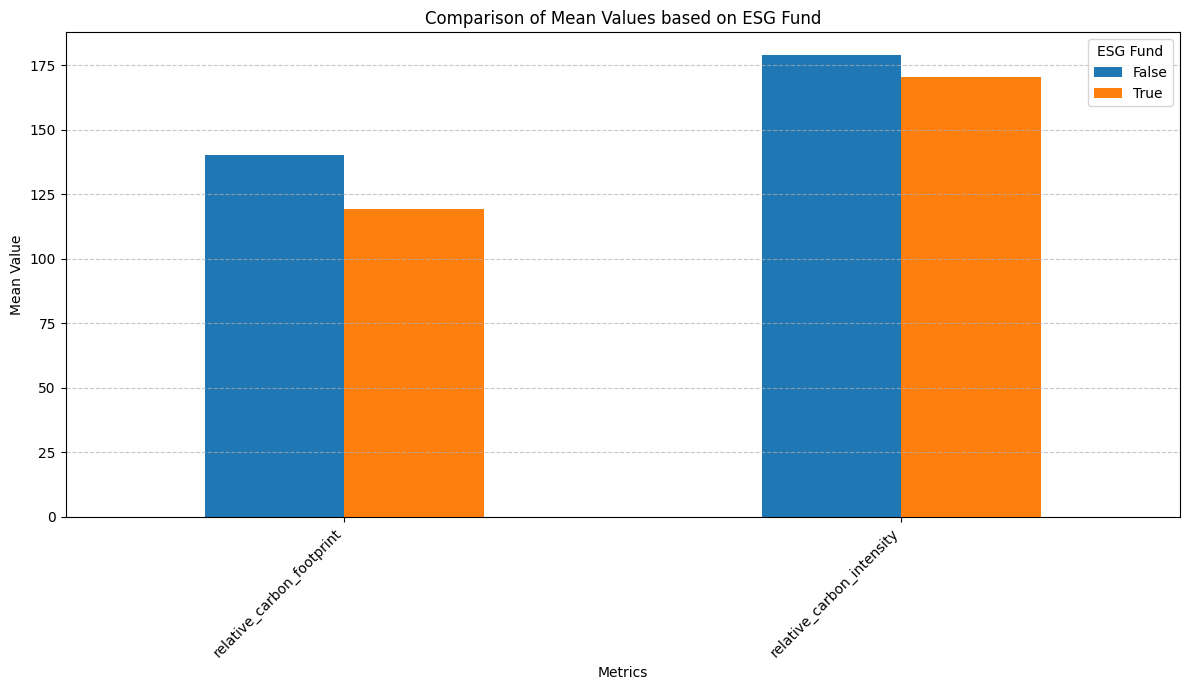

In [12]:
grouping_column = 'is_esg'
columns_to_average = [
    # 'fossil_holdings_weight',
    # 'fossil_finance_score',
    # 'fossil_finance_weight',
    'relative_carbon_footprint',
    'relative_carbon_intensity'
]


result = df.groupby(grouping_column)[columns_to_average].mean()

result_transposed = result.T

# Create the plot
ax = result_transposed.plot(kind='bar', figsize=(12, 7), rot=45) # rot rotates x-axis labels

# --- Customize the plot ---
plt.title(f'Comparison of Mean Values based on ESG Fund')
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.xticks(ha='right') # Align rotated labels nicely
plt.legend(title="ESG Fund") # Use the grouping column name for the legend title
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Show the plot ---
plt.show()

/var/folders/q3/37tc09x518n_lg3x1r20km3h0000gn/T/ipykernel_64119/673830575.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  footprint_grouped = df.groupby(['is_esg', 'footprint_bin'])['returns_since_inception'].mean().reset_index()
/var/folders/q3/37tc09x518n_lg3x1r20km3h0000gn/T/ipykernel_64119/673830575.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intensity_grouped = df.groupby(['is_esg', 'intensity_bin'])['returns_since_inception'].mean().reset_index()


<Figure size 1800x1000 with 0 Axes>

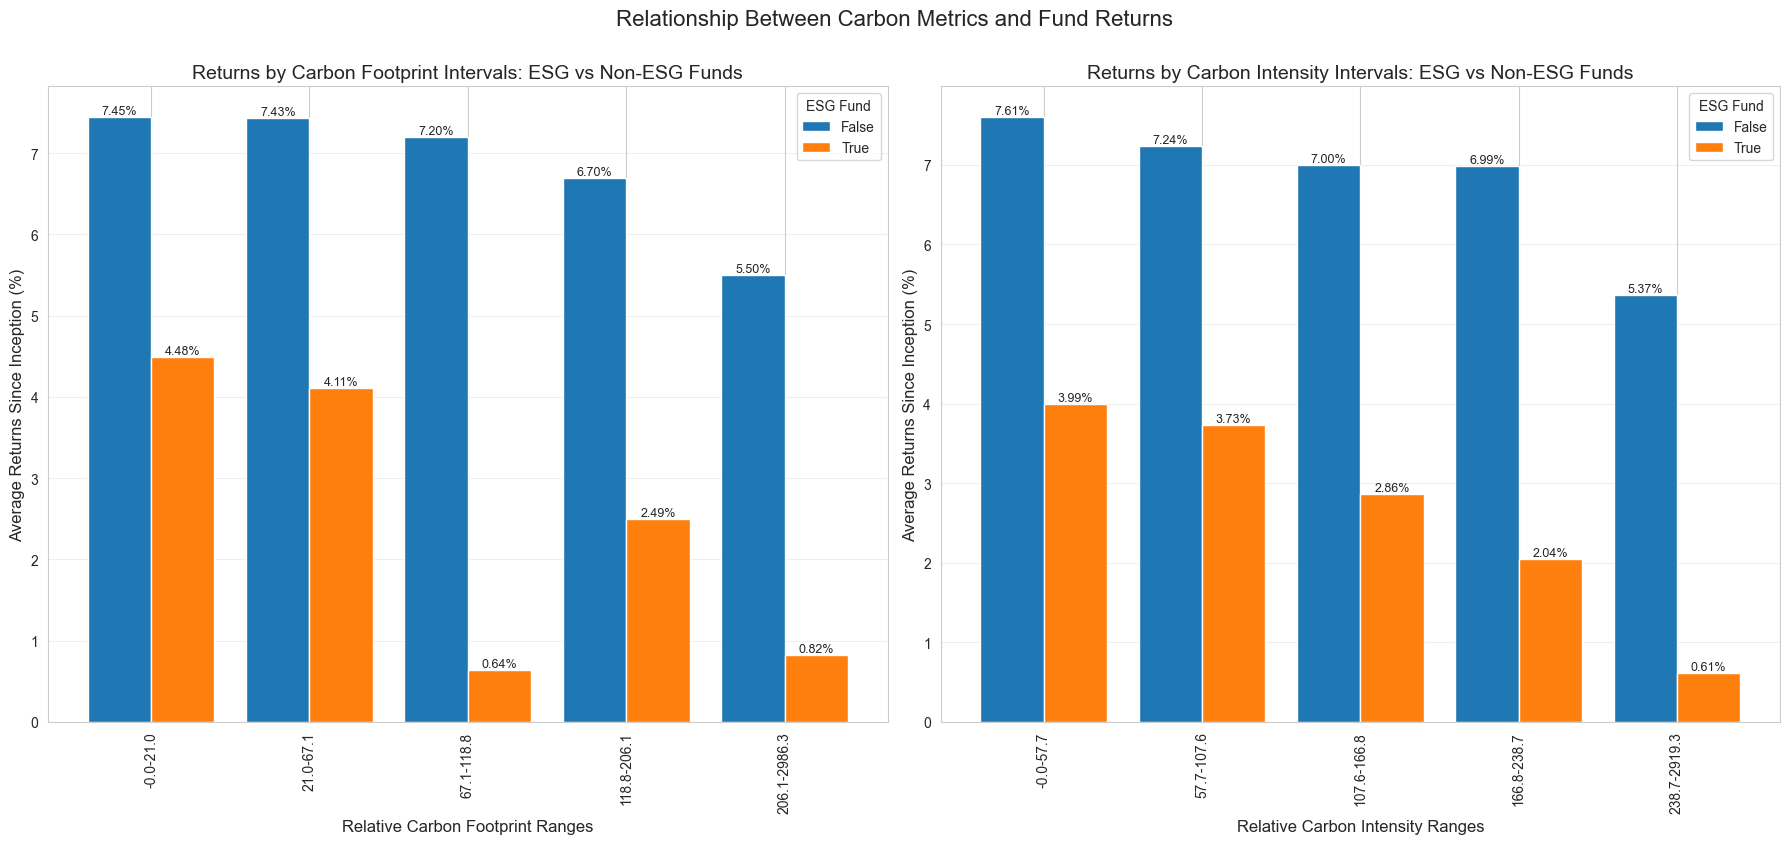

In [6]:


# Set the style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(18, 10))

# Create a 2x1 subplot layout (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Colors for ESG and non-ESG

# 1. Histogram for relative_carbon_footprint vs returns
# -----------------------------------------------------

# Create bins for carbon footprint
footprint_bins = pd.qcut(df['relative_carbon_footprint'], 5).cat.categories
bin_labels = [f"{round(float(interval.left), 1)}-{round(float(interval.right), 1)}" for interval in footprint_bins]

# Group by ESG status and carbon footprint bins
df['footprint_bin'] = pd.qcut(df['relative_carbon_footprint'], 5, labels=bin_labels)
footprint_grouped = df.groupby(['is_esg', 'footprint_bin'])['returns_since_inception'].mean().reset_index()

# Pivot the data for easier plotting
footprint_pivot = footprint_grouped.pivot(index='footprint_bin', columns='is_esg', values='returns_since_inception')

# Plot the grouped bar chart
footprint_pivot.plot(kind='bar', ax=axes[0], width=0.8)

# Add labels and title for the first subplot
axes[0].set_xlabel('Relative Carbon Footprint Ranges', fontsize=12)
axes[0].set_ylabel('Average Returns Since Inception (%)', fontsize=12)
axes[0].set_title('Returns by Carbon Footprint Intervals: ESG vs Non-ESG Funds', fontsize=14)
axes[0].legend(title='ESG Fund')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on top of each bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=9)

# 2. Histogram for relative_carbon_intensity vs returns
# ----------------------------------------------------

# Create bins for carbon intensity
intensity_bins = pd.qcut(df['relative_carbon_intensity'], 5).cat.categories
bin_labels = [f"{round(float(interval.left), 1)}-{round(float(interval.right), 1)}" for interval in intensity_bins]

# Group by ESG status and carbon intensity bins
df['intensity_bin'] = pd.qcut(df['relative_carbon_intensity'], 5, labels=bin_labels)
intensity_grouped = df.groupby(['is_esg', 'intensity_bin'])['returns_since_inception'].mean().reset_index()

# Pivot the data for easier plotting
intensity_pivot = intensity_grouped.pivot(index='intensity_bin', columns='is_esg', values='returns_since_inception')

# Plot the grouped bar chart
intensity_pivot.plot(kind='bar', ax=axes[1], width=0.8)

# Add labels and title for the second subplot
axes[1].set_xlabel('Relative Carbon Intensity Ranges', fontsize=12)
axes[1].set_ylabel('Average Returns Since Inception (%)', fontsize=12)
axes[1].set_title('Returns by Carbon Intensity Intervals: ESG vs Non-ESG Funds', fontsize=14)
axes[1].legend(title='ESG Fund')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on top of each bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f%%', fontsize=9)

# Adjust layout and add a main title
plt.tight_layout()
plt.suptitle('Relationship Between Carbon Metrics and Fund Returns', fontsize=16, y=1.05)
plt.show()

/var/folders/q3/37tc09x518n_lg3x1r20km3h0000gn/T/ipykernel_58021/2616386005.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scope_12_grouped = df.groupby(['is_esg', 'scope_12_bin'])['returns_since_inception'].mean().reset_index()
/var/folders/q3/37tc09x518n_lg3x1r20km3h0000gn/T/ipykernel_58021/2616386005.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scope_123_grouped = df.groupby(['is_esg', 'scope_123_bin'])['returns_since_inception'].mean().reset_index()


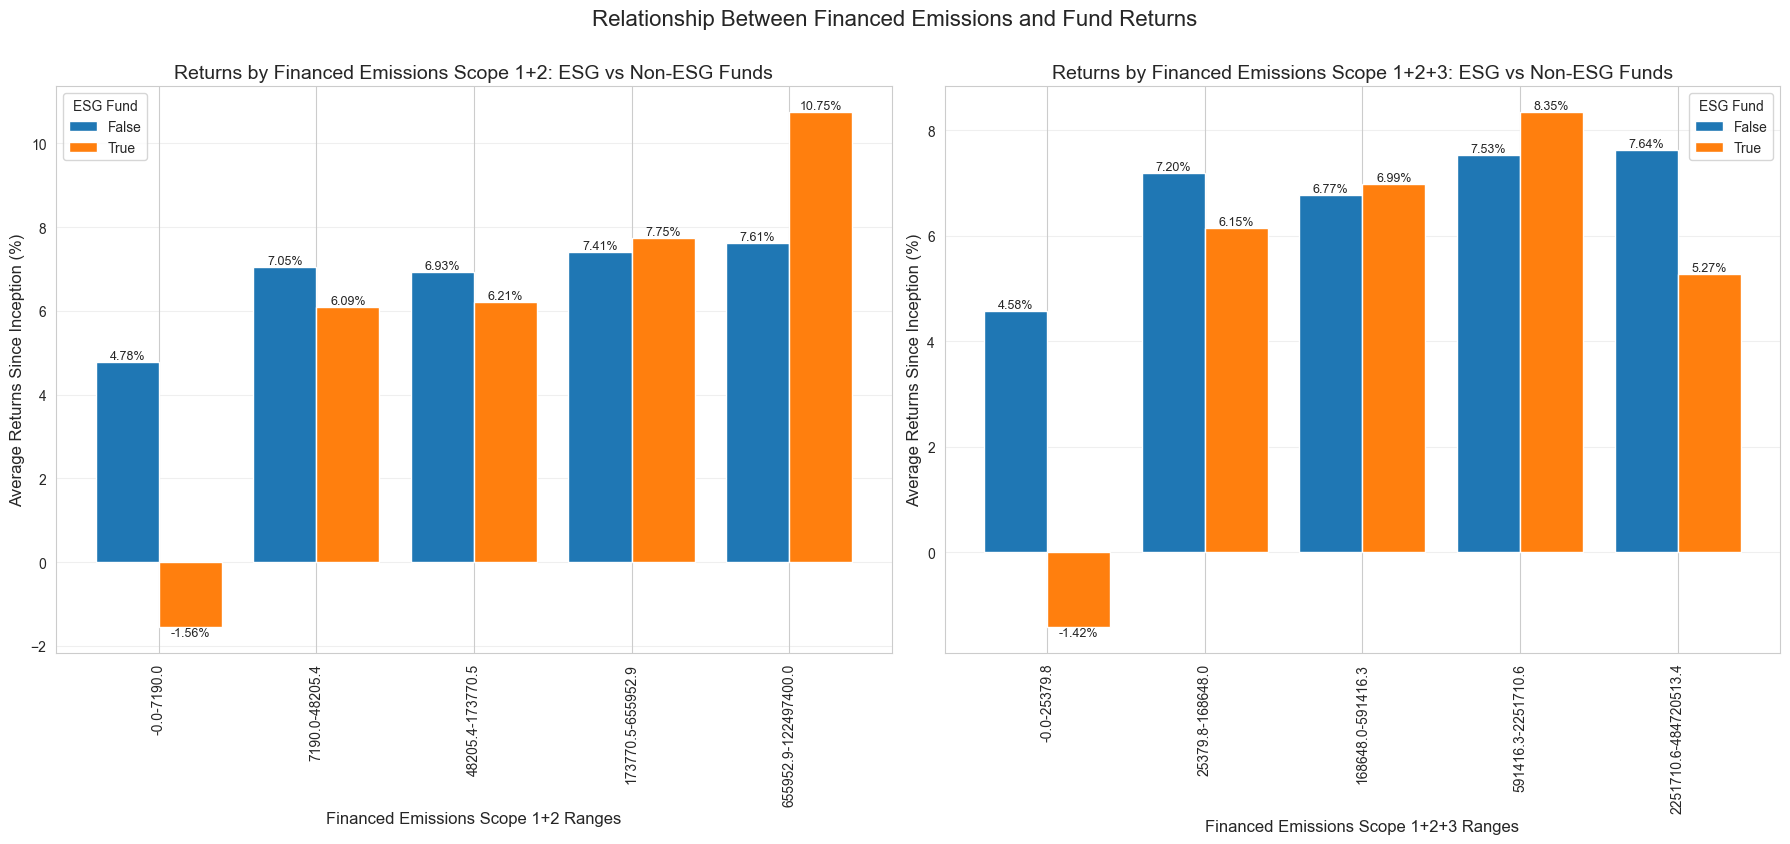

In [17]:
# Set the style for better visualization
sns.set_style("whitegrid")

# Create a 1x2 subplot layout (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Histogram for financed_emissions_scope_1_2 vs returns
# -------------------------------------------------------

# Create bins for financed emissions scope 1+2
try:
    # Try to create 5 bins
    scope_12_bins = pd.qcut(df['financed_emissions_scope_1_2'], 5).cat.categories
    bin_labels = [f"{round(float(interval.left), 1)}-{round(float(interval.right), 1)}" for interval in scope_12_bins]
except ValueError:
    # If there are duplicate values causing qcut to fail, use cut instead
    scope_12_bins = pd.cut(df['financed_emissions_scope_1_2'], 5).cat.categories
    bin_labels = [f"{round(float(interval.left), 1)}-{round(float(interval.right), 1)}" for interval in scope_12_bins]

# Group by ESG status and emissions bins
df['scope_12_bin'] = pd.qcut(df['financed_emissions_scope_1_2'], 5, labels=bin_labels, duplicates='drop')
scope_12_grouped = df.groupby(['is_esg', 'scope_12_bin'])['returns_since_inception'].mean().reset_index()

# Pivot the data for easier plotting
scope_12_pivot = scope_12_grouped.pivot(index='scope_12_bin', columns='is_esg', values='returns_since_inception')

# Plot the grouped bar chart
scope_12_pivot.plot(kind='bar', ax=axes[0], width=0.8)

# Add labels and title for the first subplot
axes[0].set_xlabel('Financed Emissions Scope 1+2 Ranges', fontsize=12)
axes[0].set_ylabel('Average Returns Since Inception (%)', fontsize=12)
axes[0].set_title('Returns by Financed Emissions Scope 1+2: ESG vs Non-ESG Funds', fontsize=14)
axes[0].legend(title='ESG Fund')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on top of each bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=9)

# 2. Histogram for financed_emissions_scope_1_2_3 vs returns
# ---------------------------------------------------------

# Create bins for financed emissions scope 1+2+3
try:
    # Try to create 5 bins
    scope_123_bins = pd.qcut(df['financed_emissions_scope_1_2_3'], 5).cat.categories
    bin_labels = [f"{round(float(interval.left), 1)}-{round(float(interval.right), 1)}" for interval in scope_123_bins]
except ValueError:
    # If there are duplicate values causing qcut to fail, use cut instead
    scope_123_bins = pd.cut(df['financed_emissions_scope_1_2_3'], 5).cat.categories
    bin_labels = [f"{round(float(interval.left), 1)}-{round(float(interval.right), 1)}" for interval in scope_123_bins]

# Group by ESG status and emissions bins
df['scope_123_bin'] = pd.qcut(df['financed_emissions_scope_1_2_3'], 5, labels=bin_labels, duplicates='drop')
scope_123_grouped = df.groupby(['is_esg', 'scope_123_bin'])['returns_since_inception'].mean().reset_index()

# Pivot the data for easier plotting
scope_123_pivot = scope_123_grouped.pivot(index='scope_123_bin', columns='is_esg', values='returns_since_inception')

# Plot the grouped bar chart
scope_123_pivot.plot(kind='bar', ax=axes[1], width=0.8)

# Add labels and title for the second subplot
axes[1].set_xlabel('Financed Emissions Scope 1+2+3 Ranges', fontsize=12)
axes[1].set_ylabel('Average Returns Since Inception (%)', fontsize=12)
axes[1].set_title('Returns by Financed Emissions Scope 1+2+3: ESG vs Non-ESG Funds', fontsize=14)
axes[1].legend(title='ESG Fund')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on top of each bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f%%', fontsize=9)

# Adjust layout and add a main title
plt.tight_layout()
plt.suptitle('Relationship Between Financed Emissions and Fund Returns', fontsize=16, y=1.05)
plt.show()